<center> <img src="https://d3i71xaburhd42.cloudfront.net/261c3e30bae8b8bdc83541ffa9331b52fcf015e6/3-Figure2-1.png" width=20% > </center>

# <center> Assignment 1: Photometric Stereo & Colour </center>
<center> Computer Vision 1 University of Amsterdam </center>
<center> Due 23:59PM, September 16, 2023 (Amsterdam time) </center>
<center> <b>TA's: Ozzy Ülger, Egoitz Gonzalez, Sina Taslimi</b></center>
    
***

Student1 ID: \
Student1 Name:

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )


# General guidelines


Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 1 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

# 0 Environment Setup

In [3]:
# environment and libraries
import os
import glob
import numpy as np
import random
import cv2
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D   # necessary in part 4.

In [4]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.2", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
# Proceed to the next cell if you don't get any error.

AssertionError: You're not using the provided Python environment!

# 1 Colour Spaces *(13 pts)*

In this part of the assignment, you will study the different colour spaces for image representations and experiment how to convert a given RGB image to a specific colour space

### 1.1 RGB Colour Model (2 pts)

Why do we use a RGB colour model as the basis of our digital cameras and photography? How does a standard digital camera capture the full RGB colour image?


*Write your answer here*


### 1.2 Colour Space Conversion *(8 pts)*




Create a function to convert an RGB image into the following colour spaces by using the template code you are provided ConvertColourSpace() below and other sub-functions. Visualize the new image and its channels separately in the same figure. That is, for example, in the case of HSV colour space, you need to visualize the converted HSV image, and its Hue, Saturation and Value channels separately (4 images, 1 figure).

__Grayscale__

Convert the RGB image into grayscale by using 3 different methods mentioned in
https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
In addition, check and report which method OpenCV uses for grayscale conversion, include it as well, and visualize all 4 in the same figure.

__Opponent Colour Space__

$\begin{pmatrix}
O_1 \\
O_2 \\
O_3
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R-G}{\sqrt{2}} \\
\frac{R+G-2B}{\sqrt{6}} \\
\frac{R+G+B}{\sqrt{3}}
\end{pmatrix}$

__Normalized RGB (rgb) Colour Space__

$\begin{pmatrix}
r \\
g \\
b
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R}{R+G+B} \\
\frac{G}{R+G+B} \\
\frac{B}{R+G+B}
\end{pmatrix}$

__HSV Colour Space__

Convert the RGB image into HSV Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2HSV)*.

__YCbCr Colour Space__

Convert the RGB image into YCbCr Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2YCrCb)*. Note, you need to arrange the channels in $Y, C_b$ and $C_r$ order.

__HINT 1__

Ensure you understand the datatypes and ranges that the python conversion and image displaying functions require. This usually is [0, 1] for float datatype or [0, 255] for integer datatype. You may have to explicitely change the datatype.

__HINT 2__

Think about how to visualise for instance H, S, V channels. Do this in a manner that is meaningfull, e.g. visualize each of the H, S, V channels in a RGB manner.  

In [4]:
def read_img(path):
    """
    Read image from path and convert it to RGB from BGR
    :param path: path to the image
    :return: image
    """
    img = cv2.imread(path)
    return img[..., ::-1]  # BGR to RGB

In [5]:
img = read_img('lab1_images/awb/awb.jpg') 

In [6]:
def rgb2grays(input_image, method='opencv'):
    # converts an RGB into grayscale by using 4 different methods

    # lightness method
    if method == 'lightness':
        new_image = (np.max(input_image, axis=2) + np.min(input_image, axis=2)) / 2

    # average method
    if method == 'average':
        new_image = np.mean(input_image, axis=2)

    # luminosity method
    if method == 'luminosity':
        new_image = 0.587 * input_image[:, :, 1] + 0.114 * input_image[:, :, 2] + 0.299  * input_image[:, :, 0]

    # built-in opencv function
    if method == 'opencv':
        new_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    return new_image


def rgb2opponent(input_image):
    # converts an RGB image into opponent colour space
    input_image = input_image.astype(np.float32)

    new_image = np.zeros(input_image.shape)
    new_image[:, :, 0] = (input_image[:, :, 0] - input_image[:, :, 1]) / np.sqrt(2)
    new_image[:, :, 1] = (input_image[:, :, 0] + input_image[:, :, 1] - 2 * input_image[:, :, 2]) / np.sqrt(6)
    new_image[:, :, 2] = (input_image[:, :, 0] + input_image[:, :, 1] + input_image[:, :, 2]) / np.sqrt(3)

    new_image = np.clip(new_image, 0, 255).astype(np.uint8)

    return new_image

def rgb2normedrgb(input_image):
    # converts an RGB image into normalized RGB colour space
    input_image = input_image.astype(np.float32)

    new_image = np.zeros(input_image.shape)
    new_image[:, :, 0] = input_image[:, :, 0] / (input_image[:, :, 0] + input_image[:, :, 1] + input_image[:, :, 2] + 1e-20)
    new_image[:, :, 1] = input_image[:, :, 1] / (input_image[:, :, 0] + input_image[:, :, 1] + input_image[:, :, 2] + 1e-20)
    new_image[:, :, 2] = input_image[:, :, 2] / (input_image[:, :, 0] + input_image[:, :, 1] + input_image[:, :, 2] + 1e-20)

    new_image = np.clip(new_image * 255, 0, 255).astype(np.uint8)


    return new_image


In [7]:
def visualize(input_image, new_image, colourpace='rgb'):
    '''
     Visualize the new image and its channels separately in the same figure.
     That is, for example, in the case of HSV colour space, you need to
     visualize the converted HSV image, and its Hue, Saturation and Value
     channels separately (4 images, 1 figure).
    '''

    plt.figure(figsize=(25, 5))
    plt.subplot(1, 5, 1)
    plt.imshow(input_image)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 5, 2)
    plt.imshow(new_image)
    plt.title('New image')
    plt.axis('off')

    for i in range(1, 4):
        plt.subplot(1, 5, i + 2)
        plt.imshow(new_image[:, :, i - 1], cmap='gray')
        plt.title('Channel {}'.format(i))
        plt.axis('off')

    plt.show()

/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-pack

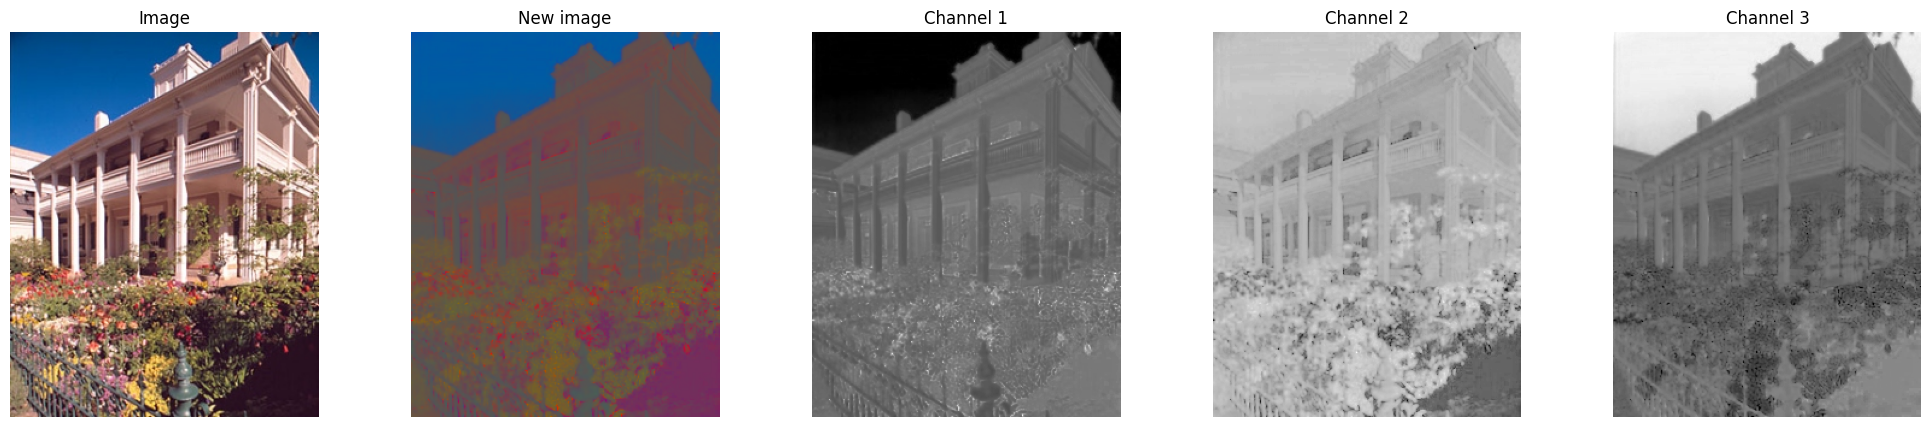

In [8]:
visualize(img, rgb2normedrgb(img), 'rgb')

In [9]:
def ConvertColourSpace(input_image, colourspace):
    '''
    Converts an RGB image into a specified color space, visualizes the
    color channels and returns the image in its new color space.

    Colorspace options:
      opponent
      rgb -> for normalized RGB
      hsv
      ycbcr
      gray

    P.S: Do not forget the visualization part!
    '''

    # Convert the image into double precision for conversions
    input_image = input_image.astype(np.float32)

    if colourspace.lower() == 'opponent':
        # fill in the rgb2opponent function
        new_image = rgb2opponent(input_image)

    elif colourspace.lower() == 'rgb':
        # fill in the rgb2normedrgb function
        new_image = rgb2normedrgb(input_image)

    elif colourspace.lower() == 'hsv':
        # use built-in function from opencv
        new_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

    elif colourspace.lower() == 'ycbcr':
        # use built-in function from opencv
        new_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2YCrCb)
        pass

    elif colourspace.lower() == 'gray':
        # fill in the rgb2grays function
        new_image = rgb2grays(input_image)

    else:
        print('Error: Unknown colorspace type [%s]...' % colourspace)
        new_image = input_image

    # visualize the converted image
    visualize(input_image, new_image, colourspace)

    return new_image


### 1.3 Colour Space Properties (2 pts)

Explain each of the above 5 colour spaces and their properties. What are the benefits of using a different colour space other than RGB? Provide reasons for each of the above cases. You can include your observations from the visualizations.

### Opponent color space
Opponent color space is a color space that models the human color vision system. It is based on the opponent process theory of vision, which assumes that the human visual system interprets color information as opposing pairs such as red or green, blue or yellow, and black or white. The opponent color space is useful for image processing tasks such as object detection and tracking, color-based segmentation, and image enhancement.

### Normalized RGB color space
Normalized RGB color space is a color space that is used to represent the color of an image. It is a normalized version of the RGB color space. The normalized RGB color space is useful for image processing tasks such as object detection and tracking, color-based segmentation, and image enhancement.

### HSV color space
HSV color space is a color space that is used to represent the color of an image. It is a normalized version of the RGB color space. The HSV color space is useful for image processing tasks such as object detection and tracking, color-based segmentation, and image enhancement.

### YCbCr color space
YCbCr color space is a color space that is used to represent the color of an image. It is a normalized version of the RGB color space. The YCbCr color space is useful for image processing tasks such as object detection and tracking, color-based segmentation, and image enhancement.

### Grayscale
Grayscale is a color space that is used to represent the color of an image. It is a normalized version of the RGB color space. The grayscale color space is useful for image processing tasks such as object detection and tracking, color-based segmentation, and image enhancement.

### 1.4 More on Colour Spaces (1 pt)

Find one more colour space from the literature, briefly explain its properties and give a use case.

### Pantone color space
Pantone is a comercial color space designed to standardize color reproduction. It is used in a variety of industries, primarily printing, though sometimes in the manufacture of colored paint, fabric, and plastics.

# 2 Colour Constancy *(15 pts)*

Colour constancy is the ability to perceive colors of objects, invariant to the colour of the light source. The aim for colour constancy algorithms is first to estimate the illuminant of the light source, and then correct the image so that the corrected image appears to be taken under a canonical (white) light source. The task of the automatic white balance (AWB) is to do the same in digital cameras so that the images taken by a digital camera look as natural as possible.

In this part of the assignment, you will implement the most famous colour constancy algorithm; *Grey-World Algorithm*. The algorithm assumes that, under a white light source, the average colour in a scene should be achromatic (grey, [128, 128, 128]).

Specific information on the algorithm can be found on:
https://en.wikipedia.org/wiki/Color_normalization#Grey_world



### 2.1 Grey-World algorithm (8 pts)

Complete the function to apply colour correction to an RGB image by using Grey-World algorithm. Display the original image and the colour corrected one on the same figure. Use awb.jpg image (provided in the downloaded zip-file) to test your algorithm. In the end, you should see that the reddish colour cast on the image is removed and it looks more natural.

  ***Note:*** You do not need to apply any pre or post processing steps. For the calculation or processing, you are not allowed to use any available code or any dedicated library function except *standard Numpy functions*.
   

In [10]:
def grey_world(awb_img):

    # fill in the grey-world algorithm
    avg_r, avg_g, avg_b = np.mean(awb_img, axis=(0, 1))

    new_image = np.zeros(awb_img.shape)
    img_mean = np.mean(awb_img)

    new_image[:, :, 0] = awb_img[:, :, 0] / avg_r * img_mean
    new_image[:, :, 1] = awb_img[:, :, 1] / avg_g * img_mean
    new_image[:, :, 2] = awb_img[:, :, 2] / avg_b * img_mean  

    colorCorrectedImg = new_image.clip(0,255).astype(int)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(awb_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(colorCorrectedImg)
    plt.title('Color Corrected Image')
    plt.axis('off')

    plt.show()

    return colorCorrectedImg

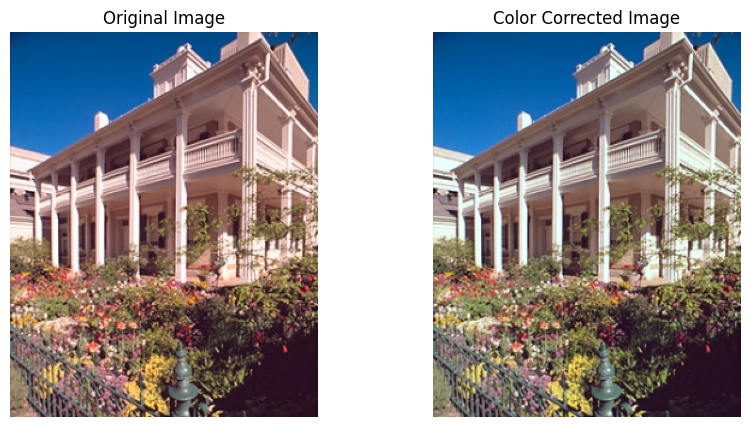

In [11]:
grey_world(img); 

### 2.2 Limits of Grey-World (2 pts)

Give an example case for Grey-World Algorithm on where it might fail. Include your reasoning.


If the illumination is not white, the average color of the image will not be gray. For example, if the illumination is red, the average color of the image will be red. In this case, the Grey-World Algorithm will fail.

### 2.3 Other Constancy algorithms (5 pts)

Find out one more colour constancy algorithm from the literature and explain it briefly.

#### White-Patch Algorithm
This algorithm assumes that the brightest color in the image is white and scales all the other colors accordingly. It's a simple but effective method for scenes where a white object is present.

# 3 Intrinsic Image Decomposition *(12 pts)*


Intrinsic image decomposition is the process of separating an image into its formation components, such as reflectance (albedo) and shading (illumination). <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) Then, under the assumptions of body (diffuse) reflection, linear sensor response and narrow band filters, the decomposition of the observed image $I(\vec{x})$ at position $\vec{x}$ can be approximated as the element-wise product of its albedo $R(\vec{x})$ and shading $S(\vec{x})$ intrinsics:

$$I(\vec{x})=R(\vec{x}) \times S(\vec{x})$$

In this part of the assignment, you will experiment with intrinsic image components to perform a particular computational photography applications: material recolouring. For the experiments, we will use images from a synthetic intrinsic image dataset. <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

<a name="cite_note-1"></a><small>1. [^](#cite_ref-1) H. G. Barrow and J. M. Tenenbaum. Recovering intrinsic scene characteristics from images. Computer Vision Systems, pages 3-26, 1978.</small>

<a name="cite_note-2"></a><small>2. [^](#cite_ref-1) http://www.cic.uab.cat/Datasets/synthetic_intrinsic_image_dataset/



### 3.1 Image decomposition *(2 pts)*

In what other components can an image be decomposed other than albedo and shading? Give an example and explain the concepts in your answer.

1. Illumination
Concept: Illumination refers to the light that illuminates the scene. It can vary across the image due to different light sources or shadows.

Example: In outdoor photography, the illumination can change due to clouds passing by or the position of the sun. By separating the illumination component, one can adjust the lighting conditions in post-processing to make the image look as if it was taken under constant lighting.

2. Texture
Concept: Texture refers to the fine details in the image that are not due to object boundaries or color changes. It includes patterns, grains, and other intricate details that give a surface its appearance.

Example: In a photograph of a brick wall, the texture would include the roughness and patterns of the bricks and mortar. Separating the texture component can help in applications like texture synthesis or removal.

3. Specularity
Concept: Specularity is the component that accounts for the shiny or glossy parts of an object, often appearing as bright spots or streaks.

Example: In a photograph of a car, the bright reflections on the windows or body are due to specularity. By isolating this component, one can adjust the perceived shininess of the object.

4. Motion
Concept: In a sequence of images or video, the motion component captures the changes in pixel values due to the movement of objects within the frame.

Example: In video surveillance, separating the motion component can help in tracking moving objects while ignoring static parts of the scene.

5. Noise
Concept: Noise refers to the random variations in pixel values that are not part of the actual scene. It can be due to sensor limitations, transmission errors, or other factors.

Example: In low-light photography, images often contain "grain" or "noise." Separating the noise component allows for noise reduction techniques to be applied.

6. Depth
Concept: Depth refers to the distance of objects from the camera. In a 2D image, depth information is often implicit but can be estimated using various techniques.

Example: In a portrait photograph, understanding the depth can help in creating a bokeh effect, where the background is blurred to make the subject stand out.


### 3.2 Synthetic data *(2 pts)*

If you check the literature, you will see that almost all intrinsic image decomposition datasets are composed of synthetic images. What might be the reason for that?

It is really hard to control the experiments (picture taken) conditions in real life. For example, the light source, the angle of the camera, the distance between the camera and the object, etc. However, in synthetic images, we can control all these conditions. Therefore, it is easier to create a dataset with synthetic images.

### 3.3. Reconstructing *(4 pts)*

Pick a favorite object from the synthetic intrinsic image dataset and store it's original image, shading and reflectance in a new folder in *'./images'*, e.g. *./images/intrinsic_images/* (or choose your own folder and change the path in the code). Show that you can actually reconstruct the original PNG image from its intrinsics using the albedo and shading. In the end, your script should output a figure displaying the original image, its intrinsic images and the reconstructed one. Complete the code for function **iid_image_formation()**.

The auxiliary functions are for opening and visualizing the original and intrinsic images. In your submission, only supply the images of the object you picked.

In [12]:
def iid_image_formation(albedo_img, shading_img):
    albedo_img_norm = albedo_img.astype(np.float32) / 255.0
    shading_img_norm = shading_img.astype(np.float32) / 255.0

    idd_img = np.multiply(albedo_img_norm, shading_img_norm) * 255
    idd_img = idd_img.astype(np.uint8)
    
    return idd_img

basket: (270, 480, 3)
objectShading: (270, 480, 3)
objectAlbedo: (270, 480, 3)


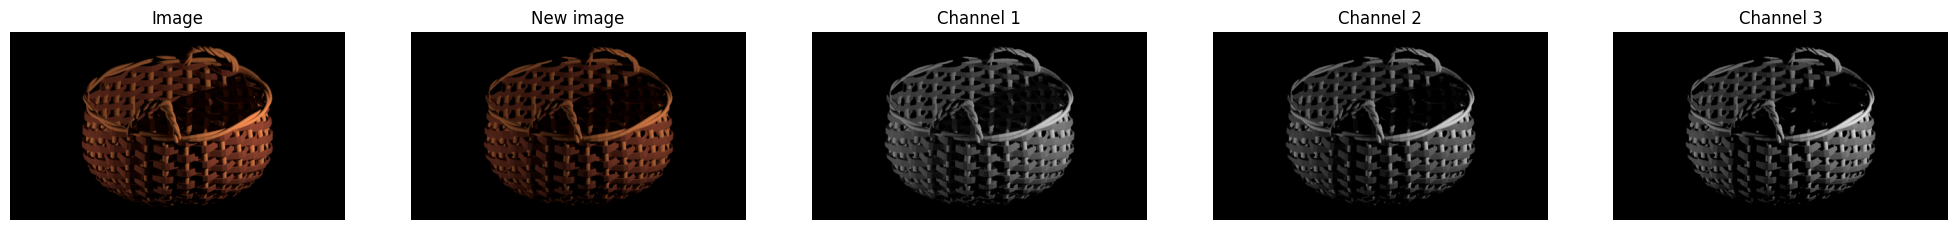

In [13]:
## Replace the image name with a valid image
img_path = './lab1_images/intrinsic_images/'
object_name = 'basket'
object_version = "_w"

## Read with opencv
picked_object = read_img(img_path + object_name + object_version + '.png')
if picked_object is None:
    print('no image found')
else:
    print(object_name + ':', picked_object.shape)

objectShading = read_img(img_path + object_name + object_version + '_shad.png')
if objectShading is None:
    print('no image found')
else:
    print('objectShading:', objectShading.shape)

objectAlbedo = read_img(img_path + object_name + '_refl.png')
if objectAlbedo is None:
    print('no image found')
else:
    print('objectAlbedo:', objectAlbedo.shape)


picked_object_IDD = iid_image_formation(objectAlbedo, objectShading)

visualize((picked_object/picked_object.max()*255.).astype(int),
          (picked_object_IDD/picked_object_IDD.max()*255.).astype(int))



### 3.4 Recoloring *(4 pts)*


Manipulating colours in photographs is an important problem with many applications in computer vision. Since the aim for recolouring algorithms is just to manipulate colours, better results can be obtained for such a task if the albedo image is available as it is independent of confounding illumination effects.

Assume that you are given the PNG image and you have access to its
intrinsic albedo and shading images.
1. Find out the true material colour of the object you picked in RGB space (which is uniform in this case).
2. Recolour the object's image with pure green (0, 255, 0). Display the original object image and the recoloured version on the same figure. Complete the code for function **recolouring()**.

3. Although you have recoloured the object with pure green, the reconstructed images do not seem to display those pure colors and thus the colour distributions over the object do not appear uniform. Explain the reason.

In [14]:
def recolouring(albedo_img, shading_img):
    true_color = np.mean(albedo_img, axis=(0, 1))
    print("True color: ", true_color)

    albedo_img_recoloured = np.zeros(albedo_img.shape)

    albedo_img_recoloured[:, :, 1] = 255

    recoloured_image = iid_image_formation(albedo_img_recoloured, shading_img)

    visualize(picked_object, recoloured_image)

    return recoloured_image

True color:  [62.47318673 32.67868056 21.09707562]


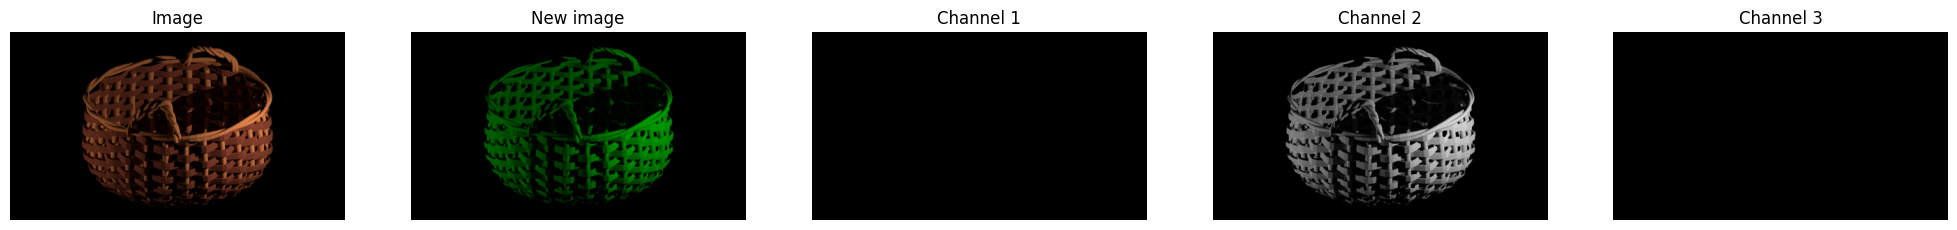

In [15]:
recolouring(albedo_img=objectAlbedo, shading_img=objectShading);

The reason the reconstructed images do not display pure green colors or appear uniformly colored is due to the interaction with the shading component. The shading image captures the effects of lighting and shadows on the object, and when you combine this with the albedo (which has been set to pure green), the resulting image will reflect these lighting conditions.

__Note:__  this was a simple case where the image is synthetic, object centered and has only one colour, and you have access to its ground-truth intrinsic images. Real world scenarios require more than just replacing a single colour with another, not to mention the complexity of achieving a decent intrinsic image decomposition.

# 4 Photometric Stereo *(60 pts)*



In this part of the assignment, you are going to implement the photometric stereo algorithm as described in Section 5.4 (Forsyth and Ponce, *Computer Vision: A Modern Approach*). The chapter snippet has been included in the assignment zip file.

Following this instruction, you will edit and fill in your code in the procedures below **estimate_alb_nrm()**, **check_integrability()** and **construct_surface()**, that you can find in the codecells below (4.1, 4.2 and 4.3, respectively). The main script **photometric_stereo** (4.4) is provided for reference and should not be taken as is. Throughout the assignment, you will be asked to perform different trials and experiments which will require you to adjust the main code accordingly; this also shows how well you can cope with the materials.

Include images of the results into your notebook at informative points. For 3D models, make sure to choose a viewpoint that makes the structure as clear as possible and/or feel free to take them from multiple viewpoints.

### 4.1 Estimating Albedo and Surface Normal *(15 pts)*
Let us start with the grayscale sphere model, which is located in the SphereGray5 folder. The folder contains 5 images of a sphere with a grayscale checker texture under similar lighting conditions as the one in the book. Your task is to estimate the surface reflectance (albedo) and surface normal of this model. The light source directions are encoded in the image file names.

1. Complete the code for function **estimate_alb_nrm()** to estimate albedo and surface normal map for the SphereGray5 folder. What do you expect to see in albedo image and how is it different from your result?
2. In principle, what is the minimum number of images you need to estimate albedo and surface normal? Run the algorithm with more images by using SphereGray25, observe the differences in the results and report. You could try all images at once or a few at the time, in an incremental fashion. Choose a strategy and justify it by discussing your results.
3. What is the impact of shadows in photometric stereo? Explain the trick that is used in the text to deal with shadows. Remove that trick from your implementation and check your results. Is the trick necessary in the case of 5 images? how about 25 images?

An answer box can be found below the code cells.

**Hint**: To get the least-squares solution of a linear system, you can use **numpy.linalg.lstsq** function.

In [97]:
# Helper functions to load the synthetic images

def load_syn_images(image_dir='./lab1_images/photometrics_images/SphereGray25/', channel=0):
    files = os.listdir(image_dir)
    nfiles = len(files)

    image_stack = None
    V = 0
    Z = 0.5

    for i in range(nfiles):
        # read input image
        im = cv2.imread(os.path.join(image_dir, files[i]))
        im = np.flip(im, axis=-1)
        im = im[:,:,channel]

        # stack at third dimension
        if image_stack is None:
            h, w = im.shape
            print('Image size (H*W): %d*%d' %(h,w) )
            image_stack = np.zeros([h, w, nfiles], dtype=int)
            V = np.zeros([nfiles, 3], dtype=np.float64)

        image_stack[:,:,i] = im

        # read light direction from image name
        X = np.double(files[i][(files[i].find('_')+1):files[i].rfind('_')])
        Y = np.double(files[i][files[i].rfind('_')+1:files[i].rfind('.png')])
        V[i, :] = [-X, Y, Z]

    # normalization
    image_stack = np.double(image_stack)
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0
    normV = np.tile(np.sqrt(np.sum(V ** 2, axis=1, keepdims=True)), (1, V.shape[1]))
    scriptV = V / normV

    return image_stack, scriptV

In [94]:
## Helper function for showing results.

def show_results(albedo, normals, height_map=None, SE=None):
    # Stride in the plot, you may want to adjust it to different images
    stride = 1

    if albedo is not None:
        # showing albedo map
        fig = plt.figure()
        #albedo_max = albedo.max()
        albedo_max = 1
        albedo = albedo / albedo_max
        print(albedo.shape)
        plt.imshow(albedo, cmap="gray")
        plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # meshgrid
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], stride),
    np.arange(0,np.shape(normals)[1], stride),
    np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]

    '''
    =============
    You could further inspect the shape of the objects and normal directions by using plt.quiver() function.
    =============
    '''

    if height_map is not None:
      # plotting model geometry
      H = height_map[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      
      plt.show()

    if SE is not None:
      # plotting the SE
      H = SE[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      plt.show()

In [73]:
import numpy.linalg as la

def estimate_alb_nrm(image_stack, scriptV, shadow_trick=True):
    '''
    Compute the gradient of the surface
    INPUT:
        - image_stack : the images of the desired surface stacked up on the 3rd dimension
        - scriptV : matrix V (in the algorithm) of source and camera information
        - shadow_trick: (true/false) whether or not to use shadow trick in solving linear equations
    OUTPUT:
        - albedo : the surface albedo
        - normal : the surface normal
    '''

    h, w, _ = image_stack.shape

    # create arrays for
    # albedo (1 channel)
    # normal (3 channels)
    albedo = np.zeros([h, w])
    normal = np.zeros([h, w, 3])

    # ================
    # YOUR CODE HERE
    #
    # for each point in the image array
    #     stack image values into a vector i
    #     construct the diagonal matrix scriptI
    #     solve scriptI * scriptV * g = scriptI * i to obtain g for this point
    #     albedo at this point is |g|
    #     normal at this point is g / |g|
    # ================

    scriptV = scriptV.astype(np.float64)

    for y in range(h):
        for x in range(w):
            # Stack image values into a vector i
            i = image_stack[y, x, :].astype(np.float64)

            if shadow_trick:
                # Construct the diagonal matrix scriptI
                scriptI = np.diag(i)

                # Solve scriptI * scriptV * g = scriptI * i to obtain g for this point
                A = np.dot(scriptI, scriptV)
                b = np.dot(scriptI, i)
            else:
                A = scriptV
                b = i

            # Solve for g using least squares
            g, _, _, _ = la.lstsq(A, b, rcond=None)

            # Albedo at this point is |g|
            albedo[y, x] = la.norm(g)

            # Normal at this point is g / |g|
            if albedo[y, x] != 0:
                normal[y, x, :] = g / albedo[y, x]

    return albedo, normal


Image size (H*W): 512*512
(512, 512)


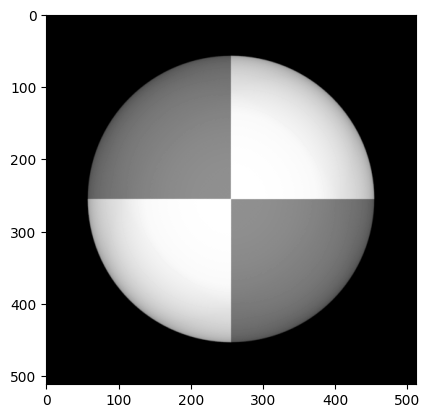

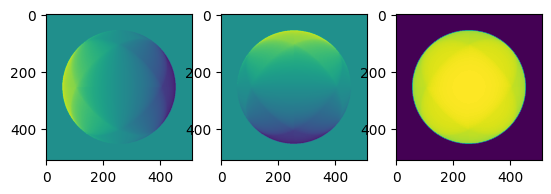

In [127]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./lab1_images/photometrics_images/SphereGray5/', channel=0)

# estimate_alb_nrm
albedo, normals = estimate_alb_nrm(image_stack, scriptV, shadow_trick=True)

# Show results
show_results(albedo, normals)

### Question 2
In principle, you need a minimum of three images to estimate both albedo and surface normal using photometric stereo, assuming that the lighting directions are linearly independent. This is because each pixel in each image gives you one equation relating the intensity, albedo, and surface normal, and you need at least three equations to solve for the three unknown components of the surface normal (plus the albedo).
#### Strategy for More Images
Using more images can improve the accuracy of your estimates by providing more equations for each pixel, allowing you to solve the system in a least-squares sense. This can be particularly useful for handling noise, shadows, and other artifacts. For example, the more pictures with different lightning points you have, the less chance that you will get a shadow in all of them. This will allow you to estimate the albedo and surface normal more accurately.

### Question 3
When you have a small amount of images with limited lighting directions, shadows can be a problem. This is because the shadowed pixels will not provide any information about the surface normal, and will thus be ignored in the estimation. This can lead to inaccurate estimates, especially if the shadows are large or cover a large portion of the image. To deal with this, the text suggests that you can ignore the shadowed pixels by setting their albedo to zero. This will allow you to estimate the surface normal more accurately, since you will not be using the shadowed pixels in the estimation. You do not really need this trick if you have sufficient amount of images that cover all the lighting directions.

In this particular case, when using only 5 images without shadow trick, we get less smooth transitions of intensities.

### 4.2 Test of Integrability *(10 pts)*



Before we can reconstruct the surface height map, it is required to compute the partial derivatives $\frac{\delta f}{\delta x}$ and $\frac{\delta f}{\delta y}$ (or *p* and *q* in the algorithm). The partial derivatives also give us a chance to double check our computation, namely the test of *integrability*.

#### 4.2.1. Compute the partial derivatives (p and q in the algorithm) by filling in your code into **check_integrability()** (5 pts).

In [109]:
def check_integrability(normals):
    '''
    Check the surface gradient is acceptable
    INPUTS:
        - normals: normal image
    OUTPUTS:
        - p : df / dx
        - q : df / dy
        - SE : Squared Errors of the 2 second derivatives
    '''

    # initalization
    p = np.zeros(normals.shape[:2])
    q = np.zeros(normals.shape[:2])
    SE = np.zeros(normals.shape[:2])

    # ================
    # YOUR CODE HERE
    # ================
    # Compute p and q, where
    # p measures value of df / dx
    # q measures value of df / dy

    # p : df/dx
    p = normals[:, :, 0] / (normals[:, :, 2] + 1e-20)
    q = normals[:, :, 1] / (normals[:, :, 2] + 1e-20)

    # change nan to 0
    p[p!=p] = 0
    q[q!=q] = 0

    # ================
    # YOUR CODE HERE
    # approximate second derivate by neighbor difference
    # and compute the Squared Errors SE of the 2 second derivatives SE
    # ================
    for x in range(0, p.shape[0] - 1):
        for y in range(0, p.shape[1] - 1):
            dp = p[x, y + 1] - p[x, y]
            dq = q[x + 1, y] - q[x, y]
            SE[x, y] = (dp - dq)**2


    return p, q, SE

# Use the normals that you found in the previous question
p, q, SE = check_integrability(normals)
print('SE:', SE.shape, SE.max())

SE: (512, 512) 1.1639573272026515


#### 4.2.2. Second derivatives (5 pts)

Implement and compute the second derivatives according to the algorithm and perform the test of integrability by choosing a reasonable threshold. What could be the reasons for the errors? How does the test perform with different numbers of images used in the reconstruction process in 4.1?

more pictures = more equations = more accurate estimates

### 4.3 Shape by Integration *(15 pts)*  
To reconstruct the surface height map, we need to continuously integrate the partial derivatives over a path. However, as we are working with discrete structures, you will be simply summing their values.

The algorithm in the chapter presents a way to do the integration in column-major order, that is you start at the top-left corner and integrate along the first column, then go towards the right along each row. Yet, it is also noticed that it would be better to use many different paths and average so as to spread around the errors in the derivative estimates.

#### 4.3.1. Construct the surface height map (7 pts)

Construct the surface height map using column-major order as described in the algorithm, then implement row-major path integration. Your code should go in **construct_surface()**.

**Note**: By default, Numpy used row-major operations. So if you are unrolling an image to linearize the operation, you will end up with a row-major representation. Numpy can be configured to be column-major. Otherwise, if you are using the double for-loops without an unrolling operation, then this concern doesn’t apply.

**Hint**: You could further inspect the shape of the objects and normal directions by using **matplotlib.pyplot.quiver** function. You will have to choose appropriate sub-sampling ratios for proper illustration. You code goes to the **show_results()** function in the code cell above.

p: (512, 512) q: (512, 512) 0.9357358455618208
(512, 512)


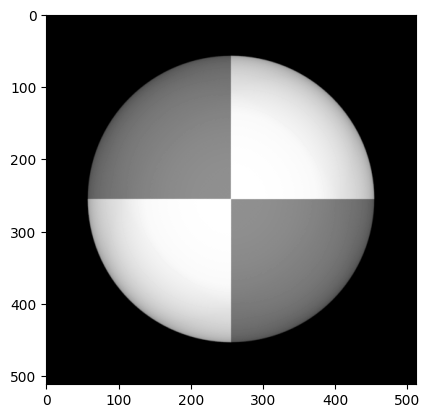

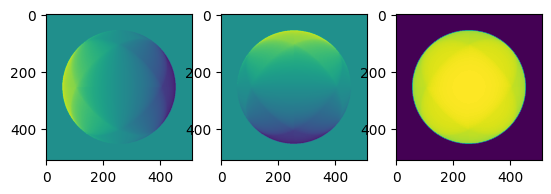

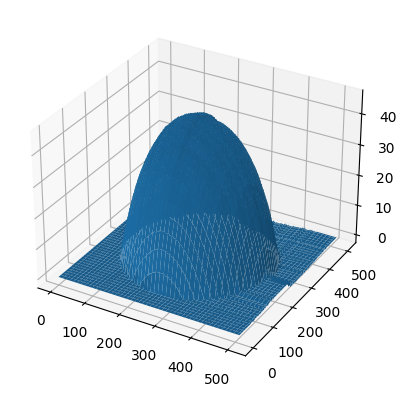

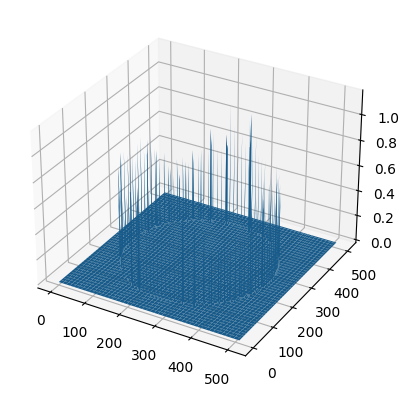

In [130]:
def construct_height_map_column(p, q):
    h, w = p.shape
    height_map = np.zeros([h, w])
    height_map[0, 0] = 0.0

    # Construct the first column based on q values
    for i in range(1, h):
        height_map[i, 0] = height_map[i-1, 0] + q[i, 0]

    # Construct the rest of the height_map based on p values
    for i in range(h):
        for j in range(1, w):
            height_map[i, j] = height_map[i, j-1] + p[i, j]
    
    return height_map

def construct_height_map_row(p, q):
    # Initialize the top-left corner to zero
    h, w = p.shape
    height_map = np.zeros([h, w])
    height_map[0, 0] = 0.0

    # Construct the first row based on p values
    for j in range(1, w):
        height_map[0, j] = height_map[0, j-1] + p[0, j]

    # Construct the rest of the height_map based on q values
    for j in range(w):
        for i in range(1, h):
            height_map[i, j] = height_map[i-1, j] + q[i, j]
    
    return height_map

def construct_surface(p, q, path_type='column'):
    '''
    Construct the surface function represented as height_map
    INPUT:
       - p : measures value of df / dx
       - q : measures value of df / dy
       - path_type: type of path to construct height_map, either 'column',
         'row', or 'average'
    OUTPUT:
       - height_map: the reconstructed surface
    '''
    if path_type == 'column':
        return construct_height_map_column(p, q)

    elif path_type == 'row':
        return construct_height_map_row(p, q)

    elif path_type=='average':
        height_map_column = construct_height_map_column(p, q)
        height_map_row = construct_height_map_row(p, q)
        return (height_map_column + height_map_row) / 2

print('p:', p.shape, 'q:', q.shape, q.max())
height_map = construct_surface(p, q, path_type='average')

show_results(albedo, normals, height_map, SE)

/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-pack

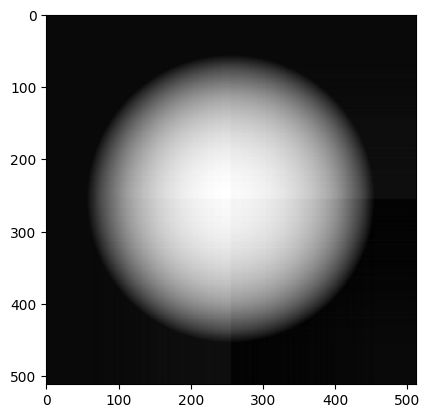

In [131]:
plt.imshow(height_map, cmap='gray')

#### 4.3.2. What are the differences in the results of the two paths? (4 pts)


*Write your answer here*

#### 4.3.3. Now, take the average of the results. (4 pts)

Do you see any improvement compared to when using only one path? Are the construction results different with different numbers of images being used?

*Write your answer here*

### 4.4 Experiments with different objects *(20 pts)*
In this part, you will try to run the photometric stereo algorithm in a various number of scenarios to see how well it can be generalized.

#### 4.4.1. Run the algorithm and show the results for the MonkeyGray model. *(5 pts)*

##### 1.a Complete the code below, run the algorithm and show the results

Loading images...

Image size (H*W): 512*512
Finish loading 121 images.

Computing surface albedo and normal map...

Integrability checking

SE: (512, 512) 2.4649849513396074
Number of outliers: 22268

(512, 512)


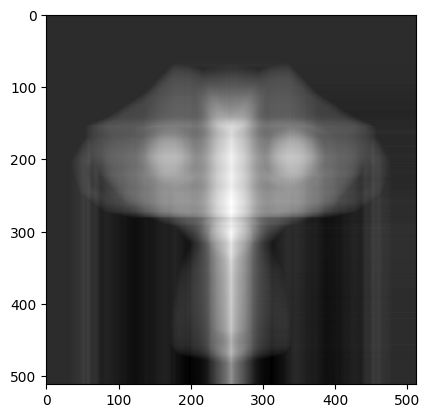

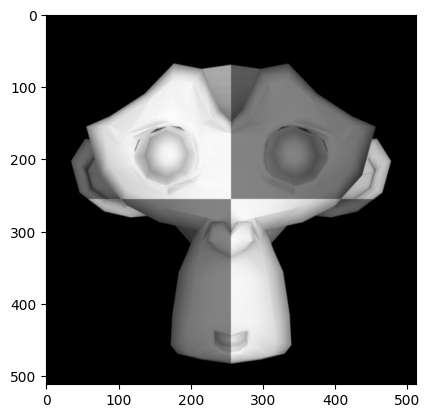

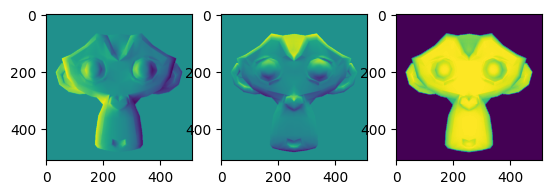

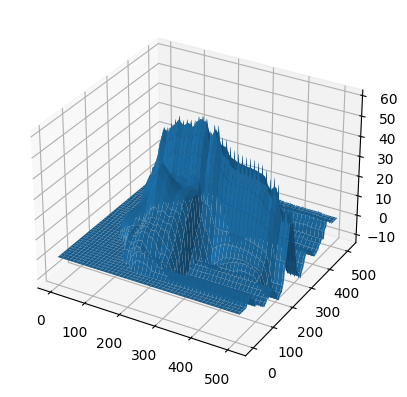

In [144]:
def photometric_stereo(image_dir='./lab1_images/photometrics_images/MonkeyGray/'):

    # obtain many images in a fixed view under different illumination
    print('Loading images...\n')
    [image_stack, scriptV] = load_syn_images(image_dir)
    image_stack = image_stack[:, :, :121]
    scriptV = scriptV[:121, :]
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)

    # compute the surface gradient from the stack of imgs and light source mat
    print('Computing surface albedo and normal map...\n')
    albedo, normals = estimate_alb_nrm(image_stack, scriptV, shadow_trick=False)

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')

    p, q, SE = check_integrability(normals)
    print('SE:', SE.shape, SE.max())

    threshold = 0.001
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization
    
    # compute the surface height
    height_map = construct_surface(p, q, path_type='average')
    plt.imshow(height_map, cmap='gray')
    # show results
    show_results(albedo, normals, height_map)

# Use the function
image_dir = 'lab1_images/photometrics_images/MonkeyGray/'
photometric_stereo(image_dir)

/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dqmis/github/nb-template/.venv/lib/python3.11/site-pack

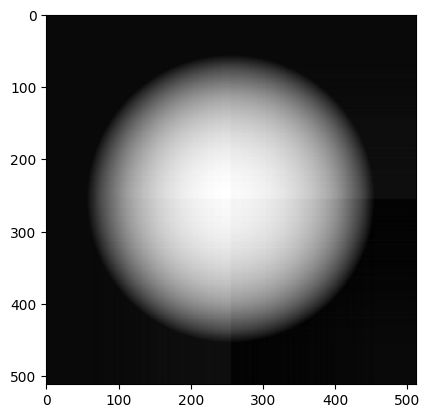

In [132]:
plt.imshow(height_map, cmap='gray')

##### 1.b Explain errors

The albedo results of the monkey may comprise more albedo errors than in case of the sphere. Observe and describe the errors: Experiment with different cases and observe the errors that arise. (You don't need to calculate and give numerical errors.)

What could be the reason for those errors? You may want to experiment with different numbers of images as you did in Question 1 to see the effects.

*Write your answer here*

##### 1.c What do you think could help solving these errors?

*Write your answer here*

#### 4.4.2. Three-channel images. *(5 pts)*

So far, we have assumed that albedos are 1-channel grayscale images and that input images are also 1-channel. To work with 3-channel images, a simple solution is to split the input image into separate channels and treat them individually. Yet, that would generate a small problem while constructing the surface normal map if a pixel value in a channel is zero.


##### 2.a Update the implementation to work for 3-channel RGB inputs and test it with 2 models SphereColor and MonkeyColor.



##### 2.b Explain your changes and show your results.

*Write your answer here*

##### 2.c Observe the problem in the constructed surface normal map and height map. Explain why a zero pixel could be a problem and propose a way to overcome that.

*Write your answer here*


#### 4.4.3. Real world dataset A *(5 pts)*   

Now, it's the time to try the algorithm on real-world datasets. For that purpose, we are going the use the Yale Face Database and the Apple dataset.

First the Yale Face Database.

##### 3.a Run the algorithm for the Yale Face images: [Yale Face Database](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html). The Yale face data is included in the lab material.

##### 3.b Observe and discuss the results for different integration paths.

An answer box can be found below the code cells.

**Hint**: For proper computation of albedo and surface normal, you may want to suspend the shadow trick described in the text, and use the original formula:
$$i = Vg(x,y)$$

In [ ]:
## help functions for loading Yale Face and Apple images

def load_face_images(image_dir='./images/photometrics_images/yaleB02/'):
    num_images = 64
    filename = os.path.join(image_dir, 'yaleB02_P00_Ambient.pgm')
    ambient_image = cv2.imread(filename, -1)
    h, w = ambient_image.shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'yaleB02_P00A*.pgm'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        ang[0,j], ang[1,j] = np.double(filenames[j][12:16]), np.double(filenames[j][17:20])
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1) - ambient_image


    x = np.cos(np.pi*ang[1,:]/180) * np.cos(np.pi*ang[0,:]/180)
    y = np.cos(np.pi*ang[1,:]/180) * np.sin(np.pi*ang[0,:]/180)
    z = np.sin(np.pi*ang[1,:]/180)
    scriptV = np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV


def load_apple_images(image_dir='./images/photometrics_images/Apple'):
    num_images = 99
    filename = os.path.join(image_dir, 'I_0000.png')
    try_image = cv2.imread(filename, -1)
    h, w = try_image[:,:,0].shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'I_00*.png'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]
    filenames_idx = []
    for i in filenames:
        filenames_idx.append(int(i.split('_')[1].split('.')[0]))

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1)[:,:,0]

    with open('./images/photometrics_images/Apple/light_directions_refined.txt') as file:
        lines = [line.split() for line in file]
        x, y, z = [], [], []
        for idx in filenames_idx:
            x.append(float(lines[idx][0]))
            y.append(float(lines[idx][1]))
            z.append(float(lines[idx][2]))

    scriptV = np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV




In [ ]:
'''
For each of Face and Apple, you should:
- Load the images
- Compute the surface albedo and normal map
- Run the integrability check
- Find the number of outliers
- Compute the surface albedo and normal mape surface height
- Show the results
'''

## Face
def photometric_stereo_face(image_dir='./images/photometrics_images/yaleB02/', path_type='average'):
    [image_stack, scriptV] = load_face_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    # YOUR CODE HERE
    # albedo, normals = ...

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    # YOUR CODE HERE
    # p, q, SE = ...

    # YOUR CODE HERE
    # threshold = XXX;
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # YOUR CODE HERE
    # compute the surface height
    # height_map = ...

    # show results
    # YOUR CODE HERE

## Apple
def photometric_stereo_apple(image_dir='./images/photometrics_images/Apple/', path_type='average'):
    [image_stack, scriptV] = load_apple_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    # YOUR CODE HERE
    # albedo, normals = ...

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    # YOUR CODE HERE
    # p, q, SE = ...

    # YOUR CODE HERE
    # threshold = XXX;
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # YOUR CODE HERE
    # compute the surface height
    # height_map = ...

    # show results
    # YOUR CODE HERE

*Write your answer here*

##### 3.c Discuss how the images violate the assumptions of the shape-from-shading methods. Remember to include specific input images to illustrate your points.


*Write your answer here*

##### 3.d How would the results improve when the problematic images are all removed? Try it out and show the results in your notebook.

*Write your answer here*

#### 4.4.4. Real world dataset B (5 pts).  

And finally, the Apple dataset. Show your results on real-world 3-channel RGB inputs, contained in the "Apple" folder, taken from [this dataset](http://vision.ucsd.edu/~nalldrin/research/cvpr08/datasets/) from the University of California San Diego.   

Observe and discuss the results for different integration paths. You may find difficulties in using this non-sythetic dataset. Try if filtering may help.

In [ ]:
# YOUR CODE HERE

*Write your answers here*

# X Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.


Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

( Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing: )

# -End of Notebook-